In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


21:56:06 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=199762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=607684;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

21:56:08 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=989186;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=163424;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

21:56:09 INFO      Starting 3ML!                                                                     ]8;id=55262;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=351926;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=195001;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=249470;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=142472;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=809584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=283849;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=459986;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

21:56:11 WARNING   Multinest minimizer not available                                           ]8;id=163382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=661373;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=907711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=258587;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

21:56:12 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=631053;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=506637;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=825776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=785440;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=606032;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=348265;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

21:56:14 WARNING   No fermitools installed                                              ]8;id=722527;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=454924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Myspeedup: 100%|██████████| 31/31 [00:00<00:00, 32.77it/s] 

Yourlib init successfully!!!


Load sub from Myspeedup: 100%|██████████| 31/31 [00:19<00:00, 32.77it/s]

In [4]:
%matplotlib inline
#####   Data Initialize

maptree = "../../data/KM2A1234full_skymap_rcy.root"
response = "../../data/KM2A1234full_mcpsf_DRfinal.root"

region_name="Diffuse_KM2A"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm(range(15,365,10))):
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.0
    model_radius = 8.0

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    KM2A.set_active_measurements(4, 13)
    KM2A.display()

    fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=2,  detector="KM2A", roi=roi, pf=True)

    Diffuse = my.set_diffusebkg(
                ra1, dec1, 7, 7, Kf=False, indexf=False, piv=50
                )
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, KM2A, lm, 4, 13, mini="ROOT")
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources])

    resu = my.getressimple(KM2A, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi"
                    )


22:07:48 INFO      Creating singleton for                                                            ]8;id=35834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=691097;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal.               
                  root                                                                                             

  0%|          | 0/35 [00:10<?, ?it/s]


KeyboardInterrupt: 

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"
cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libMathMore.so for ROOT::Math::GSLIntegrator
cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Warning in <ROOT::Math::IntegratorOneDim::CreateIntegrator>: Error loading one dimensional GSL integrator - use Gauss integrator


In [96]:
gc = []
dk = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
results=[gc,dk,de,den,dep,di,die,dien,diep]
np.save(f"../res/{region_name}/resultsall.npy",results)

Text(0.5, 0, '$GLON^{o}$')

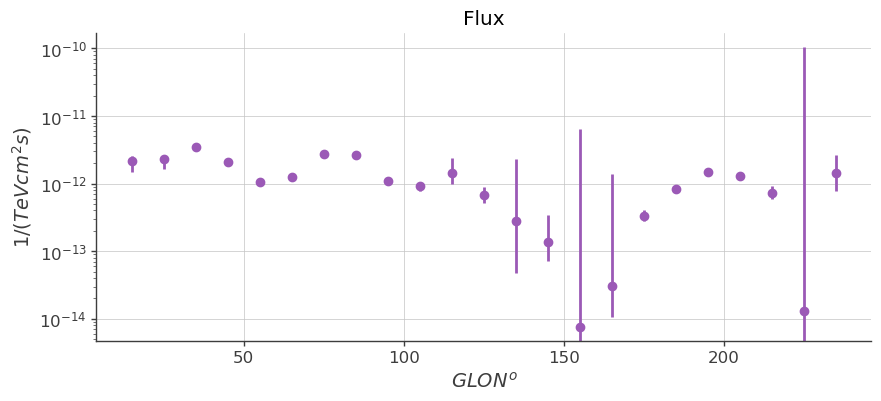

In [115]:
plt.figure(figsize=(10,4))
plt.errorbar(gc, np.array(dk)*1e9, [np.array(den)*1e9, np.array(dep)*1e9], fmt="o")
plt.yscale("log")
plt.title("Flux")
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")

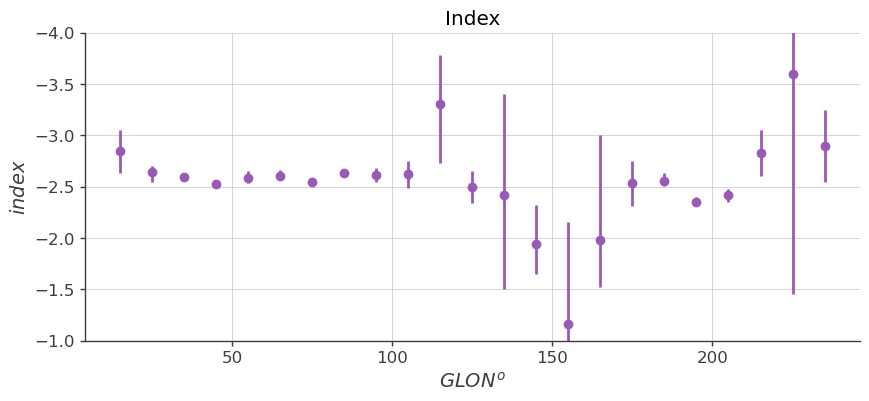

In [112]:
plt.figure(figsize=(10,4))
plt.errorbar(gc, di, [die, diep], fmt="o")
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()